In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

def eval_function(x):
    return np.sqrt(x - x**2)
    
def L_coefficients(X, x):
    L = []
    for xi in X:
        l = 1
        for xj in X:
            if xi != xj:
                l *= (x - xj) / (xi - xj)
        L.append(l)
    return L

def F_coefficents(X):
    F = [eval_function(x) for x in X]
    return F

def eval_P(X, x):
    P = [f * l for f, l in zip(F_coefficents(X), L_coefficients(X, x))]
    return sum(P)
    

In [2]:
# Set up points for evaluations
a, b, i = 0.05, 0.95, 97
X = np.linspace(a, b , num=i + 1)
# Compute the evaluations of the actual function
Y = [eval_function(x) for x in X]

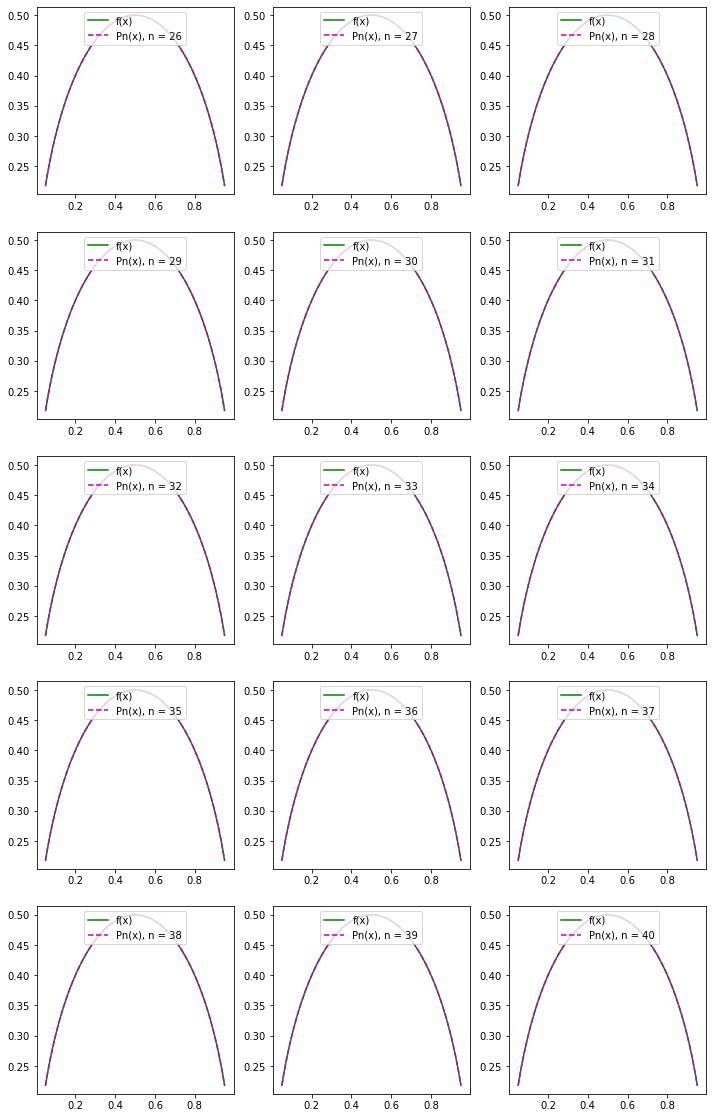

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
The average time to run one nth Lagrange interpolation polynomial algorithm: 63.055 milisecs.


In [3]:
min_order, max_order = 26, 40
n_rows = (max_order + 1 - min_order) // 3
fig, axes = plt.subplots(nrows=n_rows, ncols=3)
fig.set_size_inches(12, 20)
timing = []

# Plot a family of interpolating polynomials with order from 16, 30
for k in range(min_order, max_order + 1):
    # Start timing
    start_time = time.time()
    # Generate an array of k + 1 interpolating x-coordinates
    A = np.linspace(a, b, num=k + 1)
    # Compute interpolated evaluation by Lagrange's algorithm 
    P = [eval_P(A, x) for x in X]
    # End timing
    timing.append(time.time() - start_time)
    # Set the plot with 3 columns
    ax = axes[(k - min_order) // 3][(k - min_order) % 3]
    # Plot the function
    ax.plot(X, Y, linestyle='-', color='g', label='f(x)')
    # Plot the interpolating approximation from Lagrange's algorithm 
    ax.plot(X, P, linestyle='--', color='m', label='Pn(x), n = {}'.format(k))
    ax.legend(loc='upper center')
plt.show() 

print('* ' * 35)
print('The average time to run one nth Lagrange interpolation polynomial algorithm: {:.3f} milisecs.'\
      .format(1000 * sum(timing)/len(timing)))

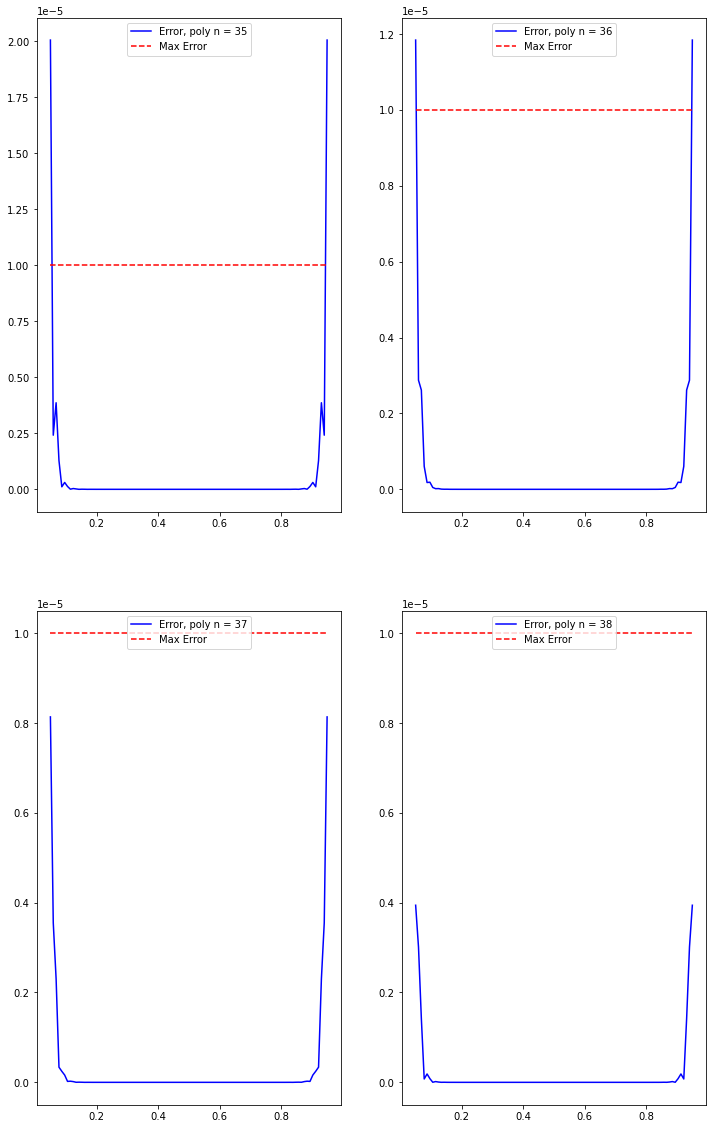

In [4]:
min_nodes, max_nodes = 35, 38
n_rows = (max_nodes + 1 - min_nodes) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2)
fig.set_size_inches(12, 20)
max_error = 10**-5

# Set up points for interpolation
c, d = 0, 1
for k in range(min_nodes, max_nodes + 1):
    # Generate an array of k + 1 interpolating x-coordinates
    A = np.linspace(c, d, num=k + 1)
    # Compute interpolated evaluation by Lagrange's algorithm
    P = [eval_P(A, x) for x in X]
    # Compute the errors between the real and the interpolated values
    E = [abs(y - p) for y, p in zip(Y, P)]   
    # Plot the errors vs. interpolating x-coordinates
    ax = axes[(k - min_nodes) // 2][(k - min_nodes) % 2]
    ax.plot(X, E, linestyle='-', color='b', label='Error, poly n = {}'.format(k))
    ax.plot([a, b], [max_error, max_error], linestyle='--', color='r', label='Max Error')
    ax.legend(loc='upper center')
plt.show()